In [16]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
# Import required dependencies
import pandas as pd
pd.options.display.max_columns=99
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np       

In [17]:
# Load dataset
bike_dataset = pd.read_csv('day.csv')

In [18]:
# Show dataset shape
bike_dataset.shape
# Show the first five samples in the dataset
bike_dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [19]:
# Show some statistical info about the dataset
bike_dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [20]:
# Check if there is any none(missing) values in the dataset to decide if will make a data cleaning or not
bike_dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [35]:
#change datatype of date 
bike_dataset['dteday'].dtype
bike_dataset['dteday'] = pd.to_datetime(bike_dataset['dteday'],format='%d-%m-%Y')
bike_dataset['dteday'].dtype

dtype('<M8[ns]')

In [37]:
#extracting day, month and year from date column
bike_dataset['year'] = pd.DatetimeIndex(bike_dataset['dteday']).year
bike_dataset['month'] = pd.DatetimeIndex(bike_dataset['dteday']).month
bike_dataset['day'] = pd.DatetimeIndex(bike_dataset['dteday']).day
bike_dataset.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day
0,1,2018-01-01,1,2018,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,6.892642,1
1,2,2018-01-02,1,2018,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,6.685861,2
2,3,2018-01-03,1,2018,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,7.207119,3
3,4,2018-01-04,1,2018,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,7.353722,4
4,5,2018-01-05,1,2018,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,7.377759,5


In [39]:
#Dropping the redundant variable holiday as the workingday column covers enough information that is required.

bike_dataset.drop('holiday',axis=1,inplace=True)

In [41]:
# Dropping the dteday,instant,casual and registered columns.

bike_dataset.drop(['dteday','instant','casual','registered'],axis=1,inplace=True)

In [44]:
bike_dataset.head()

,season,year,month,weekday,workingday,weather,temp,atemp,humidity,windspeed,count,day
0,1,2018,1,6,0,2,14.110847,18.18125,80.5833,10.749882,6.892642,1
1,1,2018,1,0,0,2,14.902598,17.68695,69.6087,16.652113,6.685861,2
2,1,2018,1,1,1,1,8.050924,9.47025,43.7273,16.636703,7.207119,3
3,1,2018,1,2,1,1,8.200000,10.60610,59.0435,10.739832,7.353722,4
4,1,2018,1,3,1,1,9.305237,11.46350,43.6957,12.522300,7.377759,5


In [43]:
# Rename some columns
print(bike_dataset.columns)
bike_dataset = bike_dataset.rename(columns={'yr':'year',
                                            'hum':'humidity',
                                            'weathersit':'weather',
                                            'cnt':'count',
                                           'hr':'hour'})
# Show dataset columns after rename some columns
print(bike_dataset.columns)

Index(['season', 'year', 'month', 'weekday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'day'],
      dtype='object')
Index(['season', 'year', 'month', 'weekday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count', 'day'],
      dtype='object')


In [22]:
# Show unique values for each column
for col in bike_dataset.columns:
    print(f"the columns {col} has: ",end='')
    print(len(bike_dataset[col].unique()),'unique values\n')

the columns instant has: 730 unique values

the columns dteday has: 730 unique values

the columns season has: 4 unique values

the columns year has: 2 unique values

the columns month has: 12 unique values

the columns holiday has: 2 unique values

the columns weekday has: 7 unique values

the columns workingday has: 2 unique values

the columns weather has: 3 unique values

the columns temp has: 498 unique values

the columns atemp has: 689 unique values

the columns humidity has: 594 unique values

the columns windspeed has: 649 unique values

the columns casual has: 605 unique values

the columns registered has: 678 unique values

the columns count has: 695 unique values



In [23]:
print(len(bike_dataset.columns))

16


the column season has:  season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
the column year has:  year
0    365
1    365
Name: count, dtype: int64
the column month has:  month
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64
the column holiday has:  holiday
0    709
1     21
Name: count, dtype: int64
the column weekday has:  weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64
the column workingday has:  workingday
1    499
0    231
Name: count, dtype: int64
the column weather has:  weather
1    463
2    246
3     21
Name: count, dtype: int64


<Figure size 500x500 with 0 Axes>

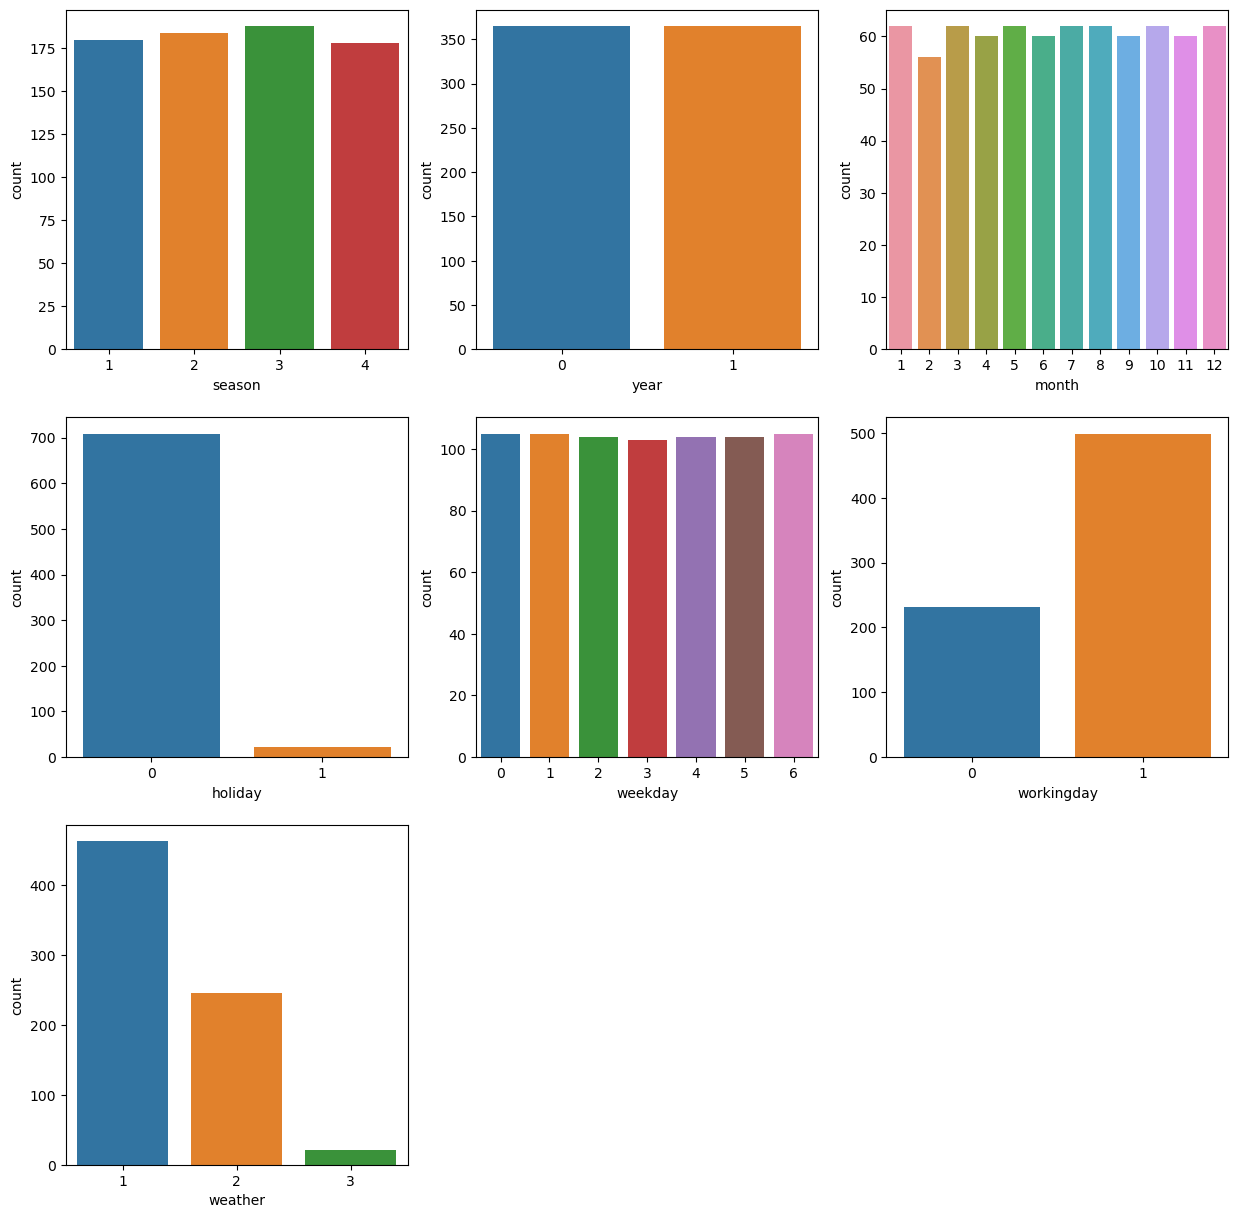

In [24]:
# Count values for each columns that has counted values and plot this count
plt.figure(figsize=(5,5))
counter=1
plt.figure(figsize=(15,15))
for col in bike_dataset.columns:
    if col not in ['instant','dteday','count','registered','casual','windspeed','humidity','atemp','temp']:
        print(f"the column {col} has: ",bike_dataset[col].value_counts())
        plt.subplot(3,3,counter)
        sns.countplot(x=col,data=bike_dataset)
        counter+=1
plt.show()   

the disttribution of column count is: 


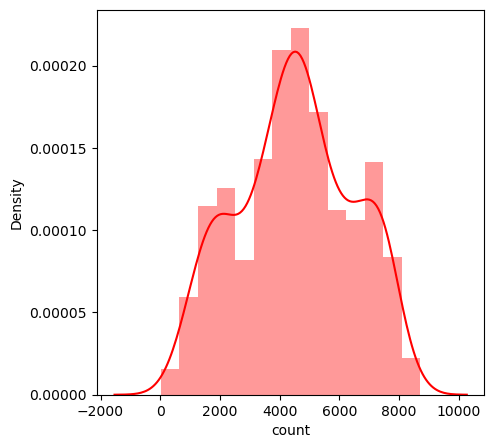

the disttribution of column temp is: 


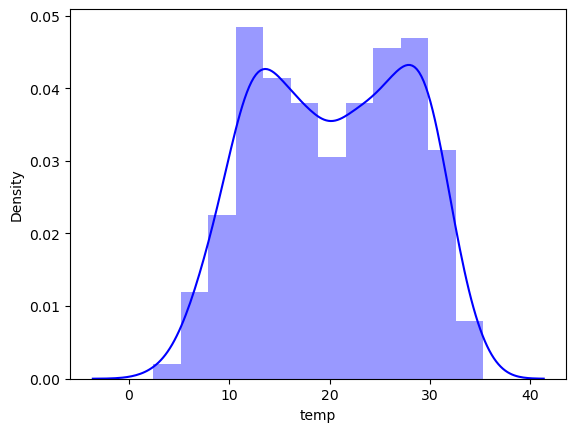

In [25]:
# Visualize distribtuion for each columns that has a lot of values
plt.figure(figsize=(5,5))
for col,color_dist in zip(['count','temp'],['red','blue']):
    print(f"the disttribution of column {col} is: ")
    sns.distplot(bike_dataset[col],color=color_dist)
    plt.show()

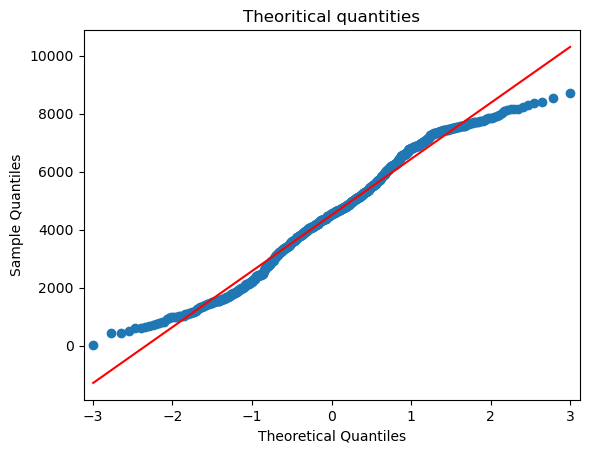

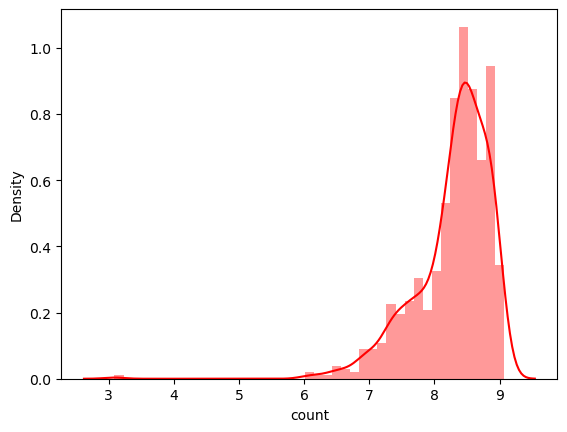

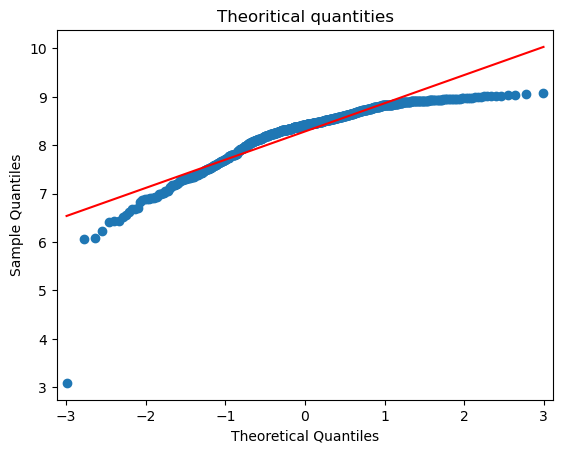

In [26]:
from statsmodels.graphics.gofplots import qqplot
qqplot(bike_dataset['count'],line='s')
plt.title('Theoritical quantities')
plt.show()
# change the distribution of count column
bike_dataset['count'] = np.log(bike_dataset['count'])
# Plot the distribution after change it
sns.distplot(bike_dataset['count'],color='red')
plt.show()
qqplot(bike_dataset['count'],line='s')
plt.title('Theoritical quantities')
plt.show()

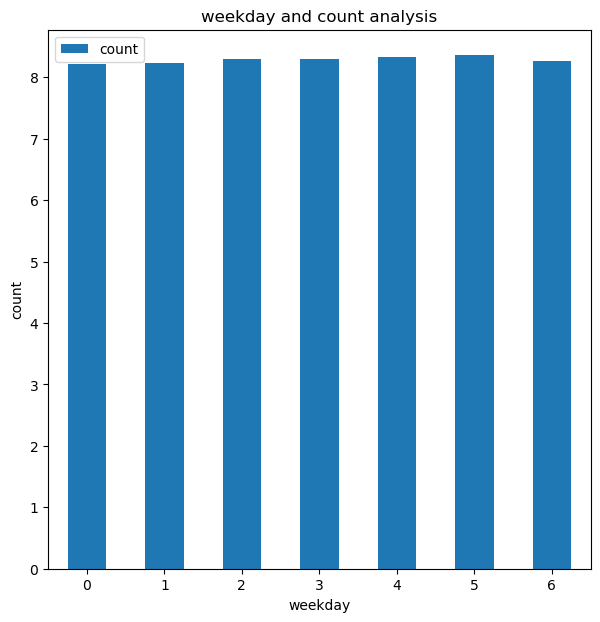

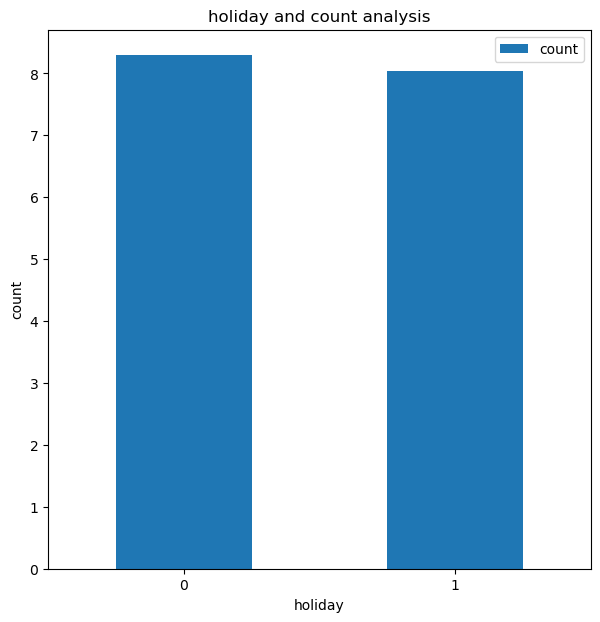

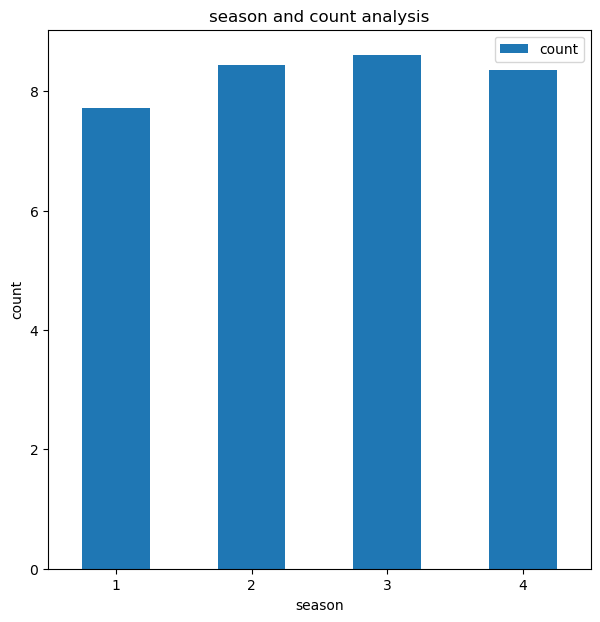

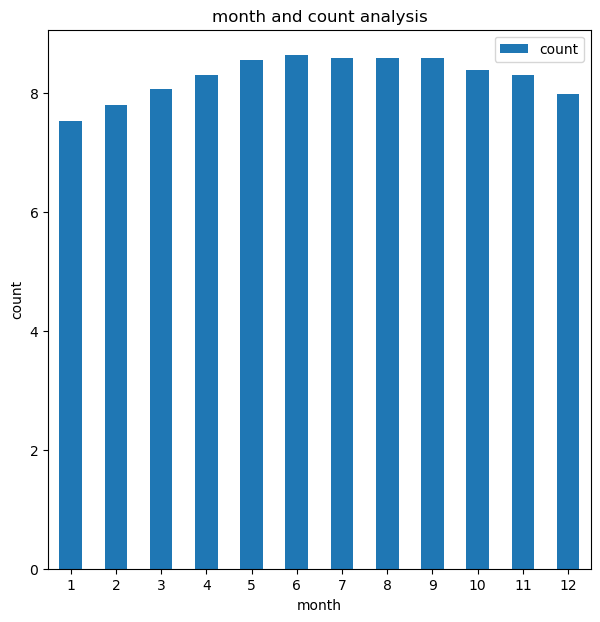

In [27]:
# group by index and make a aggfunc for values
# Bivariate analysis for weekday and count columns
weekday_relation = bike_dataset.pivot_table(index='weekday',values='count',aggfunc=np.mean)
weekday_relation.plot(kind='bar',figsize=(7,7))
plt.xlabel('weekday')
plt.ylabel('count')
plt.title('weekday and count analysis')
plt.xticks(rotation=0)
plt.show()
# Bivariate analysis for weekday and count columns
holiday_relation = bike_dataset.pivot_table(index='holiday',values='count',aggfunc=np.mean)
holiday_relation.plot(kind='bar',figsize=(7,7))
plt.xlabel('holiday')
plt.ylabel('count')
plt.title('holiday and count analysis')
plt.xticks(rotation=0)
plt.show()
# Bivariate analysis for season and count columns
holiday_relation = bike_dataset.pivot_table(index='season',values='count',aggfunc=np.mean)
holiday_relation.plot(kind='bar',figsize=(7,7))
plt.xlabel('season')
plt.ylabel('count')
plt.title('season and count analysis')
plt.xticks(rotation=0)
plt.show()
# Bivariate analysis for month and count columns
holiday_relation = bike_dataset.pivot_table(index='month',values='count',aggfunc=np.mean)
holiday_relation.plot(kind='bar',figsize=(7,7))
plt.xlabel('month')
plt.ylabel('count')
plt.title('month and count analysis')
plt.xticks(rotation=0)
plt.show()

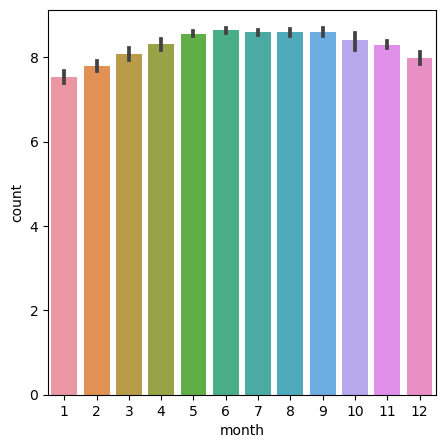

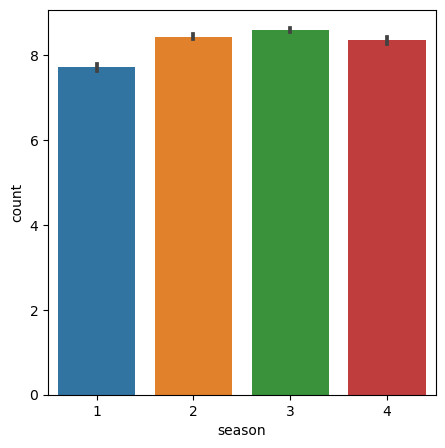

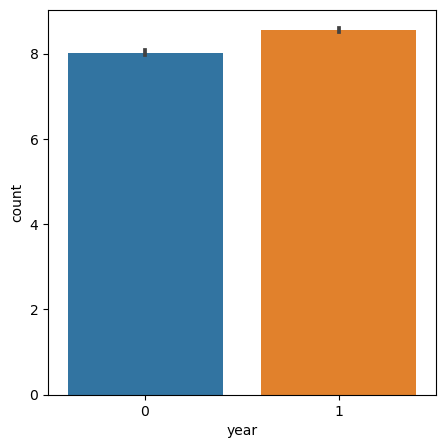

In [29]:
# groupby x and make a estimator for y-axis and without estimator the default is mean
# plot bars of count for month
plt.figure(figsize=(5,5))
sns.barplot(data=bike_dataset,x='month',y='count')
plt.show()
# plot bars of count for season
plt.figure(figsize=(5,5))
sns.barplot(data=bike_dataset,x='season',y='count')
plt.show()
# plot bars of count for year
plt.figure(figsize=(5,5))
sns.barplot(data=bike_dataset,x='year',y='count')
plt.show()

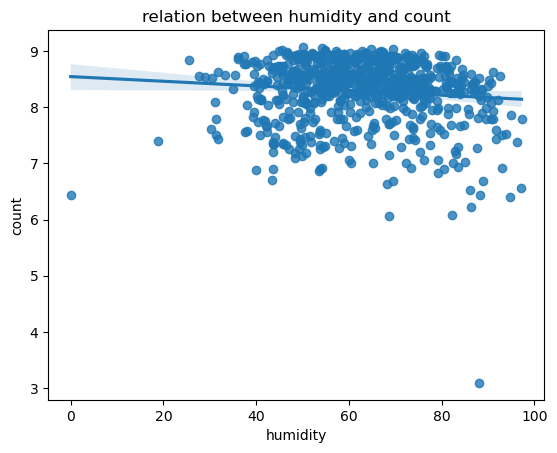

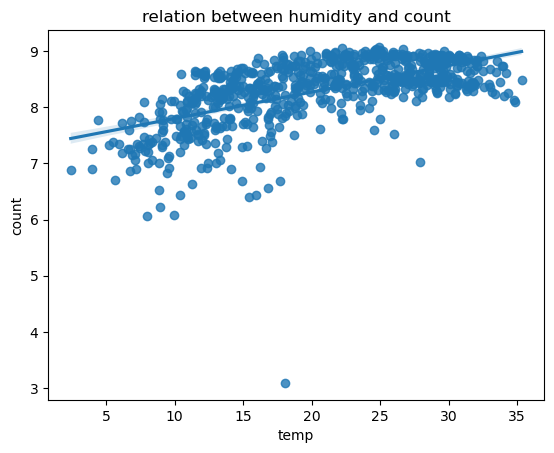

In [30]:
sns.regplot(x=bike_dataset['humidity'],y=bike_dataset['count'])
plt.title('relation between humidity and count')
plt.show()
sns.regplot(x=bike_dataset['temp'],y=bike_dataset['count'])
plt.title('relation between humidity and count')
plt.show()

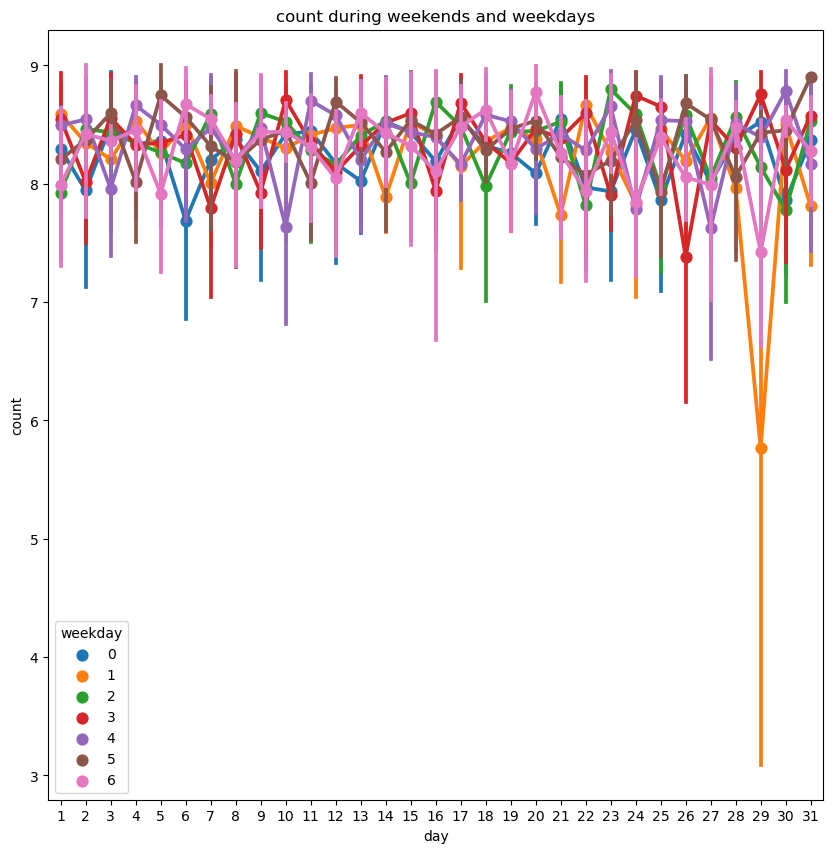

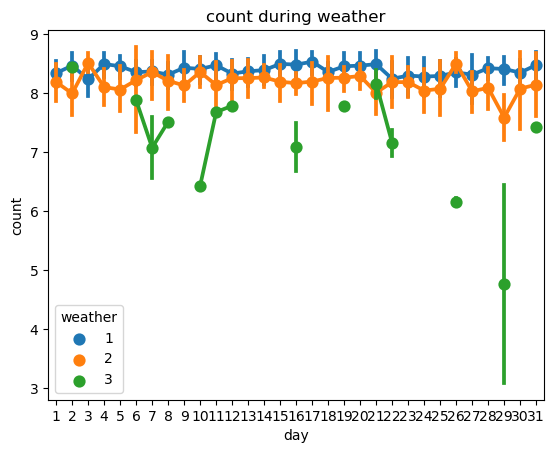

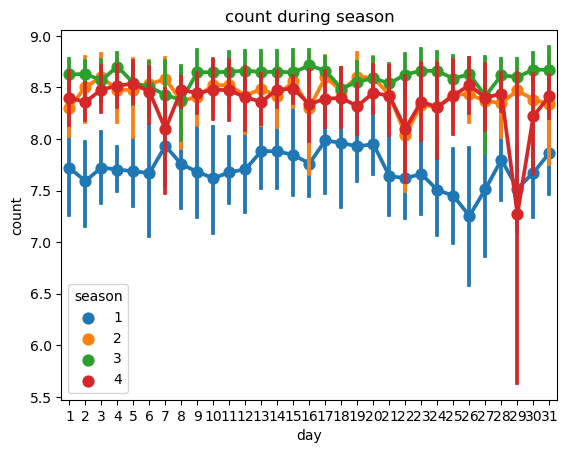

In [46]:
# plot count during weekends and weekdays
plt.figure(figsize=(10,10))
sns.pointplot(data=bike_dataset, x='day', y='count', hue='weekday')
plt.title('count during weekends and weekdays')
plt.show()
# plot count during weather
sns.pointplot(data=bike_dataset, x='day', y='count', hue='weather')
plt.title('count during weather')
plt.show()
# plot count during season
sns.pointplot(data=bike_dataset, x='day', y='count', hue='season')
plt.title('count during season')
plt.show()

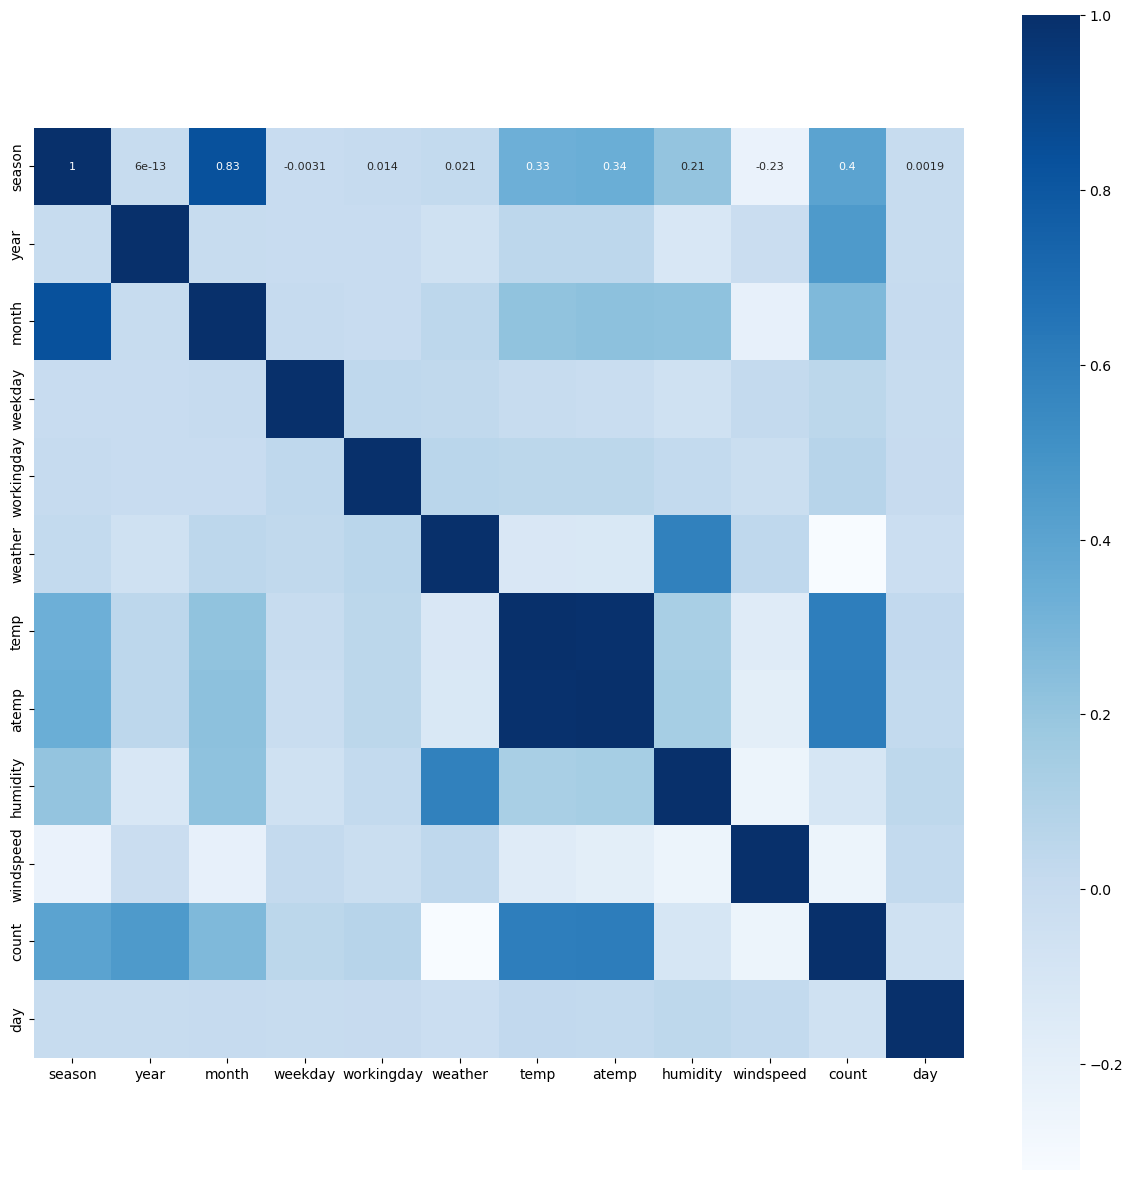

In [47]:
# Find correlation between all dataset features
correlation_values = bike_dataset.corr()
# plot correlation 
plt.figure(figsize=(15,15))
sns.heatmap(correlation_values,cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='Blues')
plt.show() 

In [52]:
bike_dataset.head()

,season,year,month,weekday,workingday,weather,temp,atemp,humidity,windspeed,count,day
0,1,2018,1,6,0,2,14.110847,18.18125,80.5833,10.749882,6.892642,1
1,1,2018,1,0,0,2,14.902598,17.68695,69.6087,16.652113,6.685861,2
2,1,2018,1,1,1,1,8.050924,9.47025,43.7273,16.636703,7.207119,3
3,1,2018,1,2,1,1,8.200000,10.60610,59.0435,10.739832,7.353722,4
4,1,2018,1,3,1,1,9.305237,11.46350,43.6957,12.522300,7.377759,5


In [55]:
cols = ['season','month','day','weekday','workingday','weather']
for col in cols:
    bike_dataset[col] = bike_dataset[col].astype('category')

In [56]:
bike_dataset.head()
bike_dataset_oh = bike_dataset
bike_dataset_oh.head()

def one_hot_encoder(data,column):
    data = pd.concat([data,pd.get_dummies(bike_dataset[column],prefix=column,drop_first=True)],axis=1)
    data = data.drop(columns = [column],axis=1)
    return data
for col in cols:
    bike_dataset_oh = one_hot_encoder(bike_dataset_oh,col)

In [57]:
bike_dataset_oh.head()

,year,temp,atemp,humidity,windspeed,count,season_2,season_3,season_4,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,day_11,day_12,day_13,day_14,day_15,day_16,day_17,day_18,day_19,day_20,day_21,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3
0,2018,14.110847,18.18125,80.5833,10.749882,6.892642,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,2018,14.902598,17.68695,69.6087,16.652113,6.685861,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,2018,8.050924,9.47025,43.7273,16.636703,7.207119,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False
3,2018,8.200000,10.60610,59.0435,10.739832,7.353722,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False
4,2018,9.305237,11.46350,43.6957,12.522300,7.377759,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False


In [59]:
# Split data into input and label data
X = bike_dataset_oh.drop(columns=['atemp','windspeed','count'],axis=1)
Y = bike_dataset_oh['count']

In [60]:
# Split data into train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.7)
print(X.shape,x_train.shape,x_test.shape)
print(Y.shape,y_train.shape,y_test.shape)

(730, 56) (510, 56) (220, 56)
(730,) (510,) (220,)


In [62]:
def plot_train_test(y_train,predicted_y_train,y_test,predicted_y_test):
    plt.figure(figsize=(7,7))
    plt.scatter(y_train,predicted_y_train,color='red',marker='X')
    plt.plot(range(int(min(y_train)),int(max(y_train))),color='black')
    plt.title('show actual and predicted train values')
    plt.xlabel('actual values')
    plt.ylabel('predicted values')
    plt.show()
    plt.scatter(y_test,predicted_y_test,color='blue',marker='o')
    plt.plot(range(int(min(y_test)),int(max(y_test))),color='black')
    plt.title('show actual and predicted test values')
    plt.xlabel('actual values')
    plt.ylabel('predicted values')
    plt.show()

In [63]:
# Train model and test it
def Train_predict(model,x_train,x_test,y_train,y_test):
    # Train model 
    model.fit(x_train,y_train)
    # Make the model predict on train and test input data
    predicted_train_data = model.predict(x_train)
    predicted_test_data = model.predict(x_test)
    # plot difference between predicted and actual values
    plot_train_test(y_train,predicted_train_data,y_test,predicted_test_data)
    # Evaluate model
    accuracy_train_pred = r2_score(y_train,predicted_train_data)
    accuracy_test_pred = r2_score(y_test,predicted_test_data)
    # Return accuracy
    return [accuracy_train_pred,accuracy_test_pred]

In [65]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

the model: LinearRegression() :


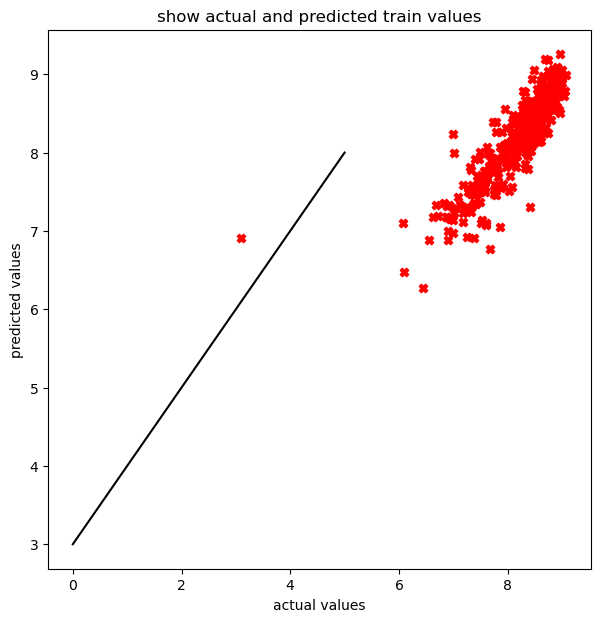

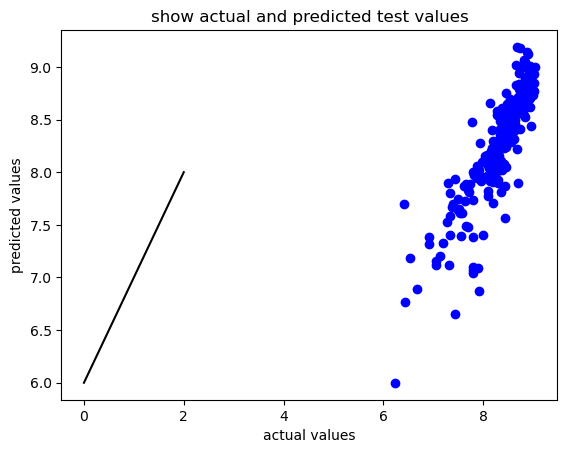

and has 0.7631463451031524 on train data and 0.7409198884764069 on test data



the model: DecisionTreeRegressor() :


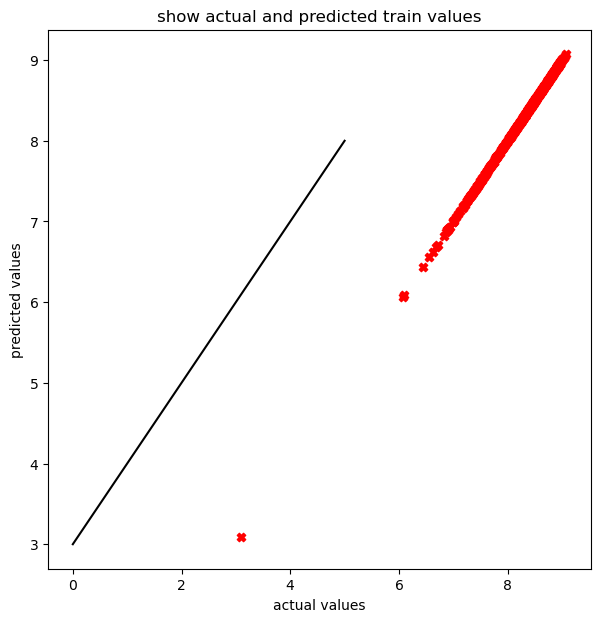

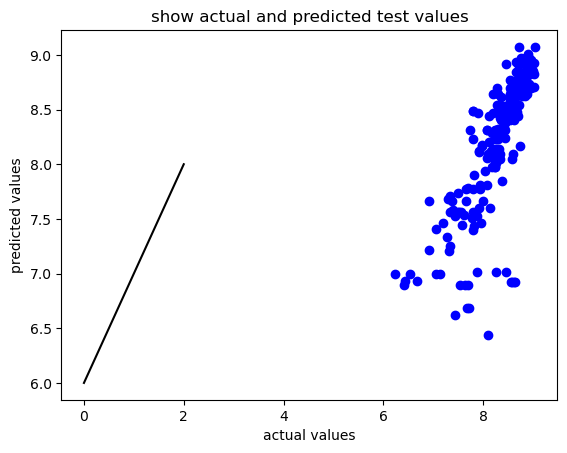

and has 1.0 on train data and 0.5077353314644288 on test data





In [66]:
Models = [
    LinearRegression(),
    DecisionTreeRegressor()
]
for model in Models: 
    print("the model:",model,":")
    accuracy_train_pred, accuracy_test_pred = Train_predict(model,x_train,x_test,y_train,y_test)
    print("and has",accuracy_train_pred,"on train data and",accuracy_test_pred,"on test data\n\n\n")